In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [53]:
col1 = '1stFlrSF'
col2 = 'LotArea'

In [54]:
df = pd.read_csv('data/train.csv', usecols=[col1, col2])
# 1stFlrSF: First Floor square feet
# LotArea: Lot size in square feet

In [55]:
df.head()

,LotArea,1stFlrSF
0,8450,856
1,9600,1262
2,11250,920
3,9550,961
4,14260,1145


In [56]:
lot_area_max, first_floor_sf_max = df['LotArea'].max(), df['1stFlrSF'].max()

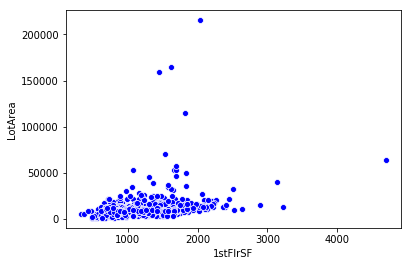

In [57]:
sns.scatterplot(x=df[col1], y=df[col2], color='b');

(0, 215245)

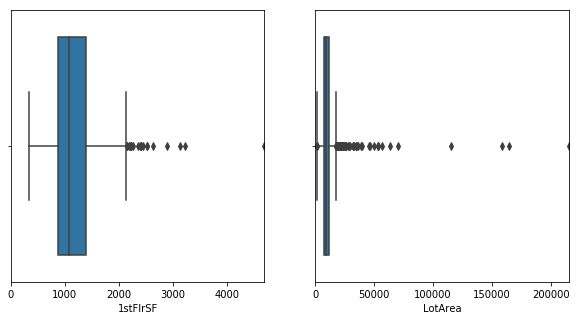

In [58]:
f, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(df['1stFlrSF'], ax=axes[0]);
sns.boxplot(df['LotArea'], ax=axes[1]);

axes[0].set_xlim((0, first_floor_sf_max))
axes[1].set_xlim((0, lot_area_max))

# Z-Score

In [59]:
z_scores = np.abs(stats.zscore(df))

In [60]:
pd.DataFrame(z_scores, columns=['1stFlrSF Z-Score', 'LotArea Z-Score']).head()

,1stFlrSF Z-Score,LotArea Z-Score
0,0.207142,0.793434
1,0.091886,0.257140
2,0.073480,0.627826
3,0.096897,0.521734
4,0.375148,0.045611


In [61]:
THRESHOLD = 3
row_inds, col_inds = np.where(z_scores > THRESHOLD)

In [62]:
pd.DataFrame({'Outlier Row Index' : row_inds, 'Outlier Column Index' : col_inds}).head()

,Outlier Row Index,Outlier Column Index
0,53,0
1,224,1
2,249,0
3,313,0
4,335,0


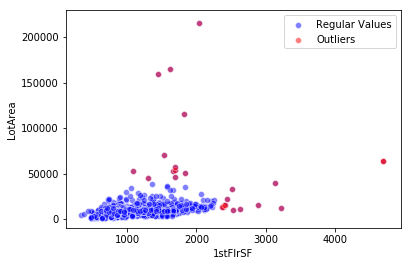

In [63]:
sns.scatterplot(x=df[col1], y=df[col2], color='b', alpha=0.5, label='Regular Values');
sns.scatterplot(x=df.loc[row_inds, col1], y=df.loc[row_inds, col2], color='r', alpha=0.5, label='Outliers');

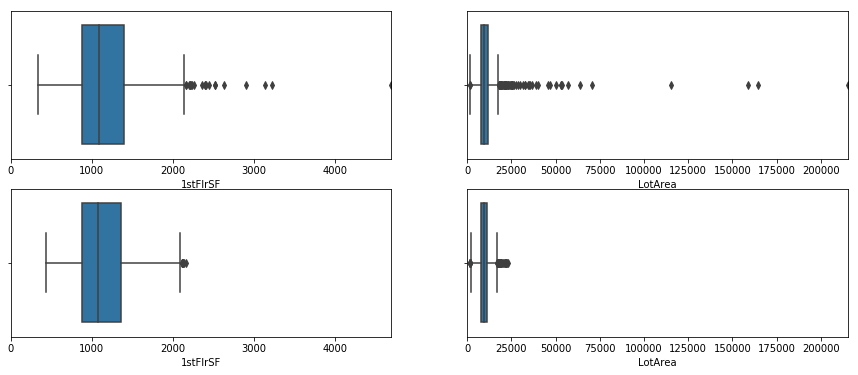

In [80]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))

sns.boxplot(df['1stFlrSF'], ax=axes[0,0]);
sns.boxplot(df['LotArea'], ax=axes[0,1]);
sns.boxplot(df.drop(row_inds)['1stFlrSF'], ax=axes[1,0]);
sns.boxplot(df.drop(row_inds)['LotArea'], ax=axes[1,1]);

axes[0,0].set_xlim((0, first_floor_sf_max))
axes[0,1].set_xlim((0, lot_area_max))
axes[1,0].set_xlim((0, first_floor_sf_max))
axes[1,1].set_xlim((0, lot_area_max));

# IQR

In [67]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [68]:
pd.DataFrame({'Quantile 1' : q1, 'Quantile 3' : q3, 'IQR' : iqr})

,Quantile 1,Quantile 3,IQR
LotArea,7553.5,11601.50,4048.00
1stFlrSF,882.0,1391.25,509.25


In [69]:
is_outside_iqr = (df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))
is_outside_iqr.head()

,LotArea,1stFlrSF
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [70]:
row_inds, col_inds = np.where(is_outside_iqr)
pd.DataFrame({'Outlier Row Index' : row_inds, 'Outlier Column Index' : col_inds}).head()

,Outlier Row Index,Outlier Column Index
0,53,0
1,66,0
2,66,1
3,70,1
4,113,0


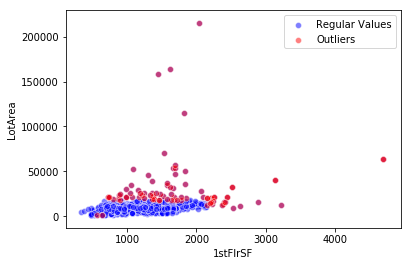

In [71]:
sns.scatterplot(x=df[col1], y=df[col2], color='b', alpha=0.5, label='Regular Values');
sns.scatterplot(x=df.loc[row_inds, col1], y=df.loc[row_inds, col2], color='r', alpha=0.5, label='Outliers');

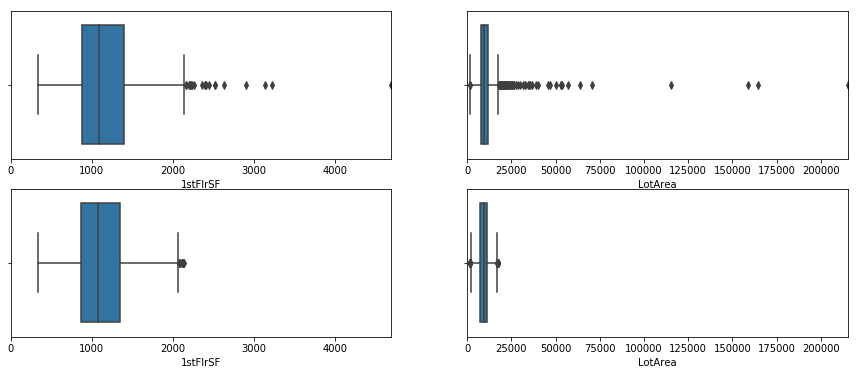

In [105]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))

sns.boxplot(df['1stFlrSF'], ax=axes[0,0]);
sns.boxplot(df['LotArea'], ax=axes[0,1]);
sns.boxplot(df.drop(row_inds)['1stFlrSF'], ax=axes[1,0]);
sns.boxplot(df.drop(row_inds)['LotArea'], ax=axes[1,1]);

axes[0,0].set_xlim((0, first_floor_sf_max))
axes[0,1].set_xlim((0, lot_area_max))
axes[1,0].set_xlim((0, first_floor_sf_max))
axes[1,1].set_xlim((0, lot_area_max));

# Isolation Forest

In [73]:
from sklearn.ensemble import IsolationForest

In [74]:
classifier = IsolationForest(contamination=0.05, random_state=0)

In [75]:
classifier.fit(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.05,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [76]:
predictions = classifier.predict(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [77]:
row_inds = np.where(predictions==-1)[0]

In [26]:
predictions.max()

1

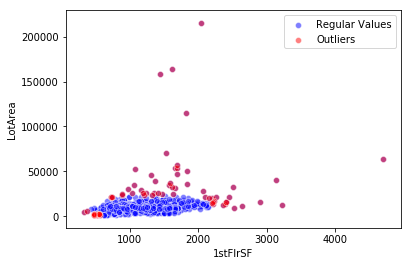

In [51]:
sns.scatterplot(x=df[col1], y=df[col2], color='b', alpha=0.5, label='Regular Values');
sns.scatterplot(x=df.loc[row_inds, col1], y=df.loc[row_inds, col2], color='r', alpha=0.5, label='Outliers');

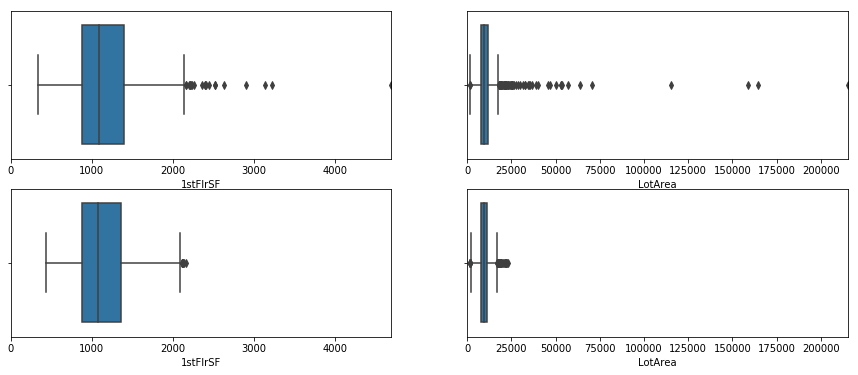

In [79]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))

sns.boxplot(df['1stFlrSF'], ax=axes[0,0]);
sns.boxplot(df['LotArea'], ax=axes[0,1]);
sns.boxplot(df.drop(row_inds)['1stFlrSF'], ax=axes[1,0]);
sns.boxplot(df.drop(row_inds)['LotArea'], ax=axes[1,1]);

axes[0,0].set_xlim((0, first_floor_sf_max))
axes[0,1].set_xlim((0, lot_area_max))
axes[1,0].set_xlim((0, first_floor_sf_max))
axes[1,1].set_xlim((0, lot_area_max));